# A Python Data Parsing and Visualization for VR Ball Catching Experiment

In [1]:
from __future__ import division

import pandas as pd
import numpy as np
from scipy import signal as sig

#import cv2
import os
import scipy.io as sio
import matplotlib

%matplotlib notebook


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


## Specify the subject folder list or the subject you want to run the analysis

In [2]:
fileTimeList = ['2016-4-19-14-4', '2016-4-22-11-57', '2016-4-27-13-28', '2016-4-28-10-57', '2016-4-29-11-56',
 '2016-5-3-12-52', '2016-5-4-13-3', '2016-5-5-13-7', '2016-5-6-11-2', '2016-5-6-13-4']

#fileTime = '2016-1-29-16-43'
# I picked the last subject here
fileTime = fileTimeList[-1]
print(fileTime)

2016-5-6-13-4


## Modify the filePath according to where the datase is saved

In [3]:
expCfgName = "gd_pilot.cfg"
sysCfgName = "PERFORMVR.cfg"

filePath = "/hdd01/VR-Dataset/" + fileTime + "/"
fileName = "exp_data-" + fileTime


## Let's read the data frames

In [12]:


sessionDict = pd.read_pickle(filePath + fileName + '.pickle')

rawDataFrame = sessionDict['raw']
processedDataFrame = sessionDict['processed']
calibDataFrame = sessionDict['calibration']
trialInfoDataFrame = sessionDict['trialInfo']

## Let's see what is inside the raw data frame

In [5]:
rawDataFrame[0:5]

frameNumber      IOD      IPD ballFinalPos              \
                                                  X        Y  Z   
frameNum                                                          
0              10797  64.8047  65.2305  -0.00862943  1.17583  0   
1              10798   64.806  65.2294  -0.00862943  1.17583  0   
2              10799  64.8073  65.2222  -0.00862943  1.17583  0   
3              10800  64.8073  65.2222  -0.00862943  1.17583  0   
4              10801   64.809  65.2311  -0.00862943  1.17583  0   

         ballInitialPos             ballInitialVel  ...   viewMat     \
                      X       Y   Z              X  ...        14 15   
frameNum                                            ...                
0              -7.22369  1.8598  20         3.7974  ... -0.109888  1   
1              -7.22369  1.8598  20         3.7974  ... -0.112631  1   
2              -7.22369  1.8598  20         3.7974  ... -0.115559  1   
3              -7.22369  1.8598  20         3.7974  ... -0.118333  1   
4              -7.22369  1.8598  20         3.7974  ... -0.121742  1   

           viewPos                       viewQuat                       \
                 X        Y         Z           X         Y          Z   
frameNum                                                                 
0        -0.975283  1.58199 -0.109888 -0.00228223 -0.124441 -0.0207849   
1        -0.973299  1.58234 -0.112631  -0.0039463 -0.125008 -0.0206622   
2        -0.971469  1.58249 -0.115559 -0.00549355 -0.125491  -0.020463   
3        -0.969394  1.58294 -0.118333 -0.00698145 -0.125847 -0.0202717   
4        -0.967201  1.58364 -0.121742 -0.00841127 -0.126347 -0.0202151   

                        SubjectID  
                 W                 
frameNum                           
0         0.992007  2016-5-6-13-4  
1         0.991933  2016-5-6-13-4  
2         0.991868  2016-5-6-13-4  
3         0.991818  2016-5-6-13-4  
4         0.991744  2016-5-6-13-4  

[5 rows x 238 columns]

In [6]:
list(rawDataFrame.columns)

[('frameNumber', ''),
 ('IOD', ''),
 ('IPD', ''),
 ('ballFinalPos', 'X'),
 ('ballFinalPos', 'Y'),
 ('ballFinalPos', 'Z'),
 ('ballInitialPos', 'X'),
 ('ballInitialPos', 'Y'),
 ('ballInitialPos', 'Z'),
 ('ballInitialVel', 'X'),
 ('ballInitialVel', 'Y'),
 ('ballInitialVel', 'Z'),
 ('ballPos', 'X'),
 ('ballPos', 'Y'),
 ('ballPos', 'Z'),
 ('ballTTC', ''),
 ('ballVel', 'X'),
 ('ballVel', 'Y'),
 ('ballVel', 'Z'),
 ('blankDur', ''),
 ('blockNumber', ''),
 ('calibrationCounter', ''),
 ('calibrationPos', 'X'),
 ('calibrationPos', 'Y'),
 ('calibrationPos', 'Z'),
 ('cycEyeBasePoint', 'X'),
 ('cycEyeBasePoint', 'Y'),
 ('cycEyeBasePoint', 'Z'),
 ('cycEyeInHead', 'X'),
 ('cycEyeInHead', 'Y'),
 ('cycEyeInHead', 'Z'),
 ('cycEyeNodeInWorld', 'X'),
 ('cycEyeNodeInWorld', 'Y'),
 ('cycEyeNodeInWorld', 'Z'),
 ('cycEyeOnScreen', 'X'),
 ('cycEyeOnScreen', 'Y'),
 ('cycGazeNodeInWorld', 'X'),
 ('cycGazeNodeInWorld', 'Y'),
 ('cycGazeNodeInWorld', 'Z'),
 ('cycInverseMat', '0'),
 ('cycInverseMat', '1'),
 ('cycInve

### Here are the important columns that will be needed for reconstruction/visualization of the experiment

### Please note that all these values are in  <font color='red'>world coordinate system</font> 

In [7]:
rawDataFrame[['frameNumber', 'frameTime', 'ballPos', 'isBallVisibleQ', 'paddlePos','paddleQuat', 'viewPos', 'viewQuat']][0:5]

frameNumber frameTime  ballPos                   isBallVisibleQ  \
                                      X        Y        Z                  
frameNum                                                                   
0              10797    794.65 -7.17317  1.97791    19.86           True   
1              10798   794.663 -7.12262  2.09435  19.7198           True   
2              10799   794.676 -7.07201   2.2092  19.5796           True   
3              10800    794.69 -7.02143  2.32223  19.4394           True   
4              10801   794.703 -6.97078   2.4337  19.2989           True   

         paddlePos                    paddleQuat                      \
                 X        Y         Z          X         Y         Z   
frameNum                                                               
0         -0.68321  1.41418  0.212399   0.866933 -0.240231   0.36797   
1        -0.681674   1.4138  0.210206    0.86576 -0.241284  0.369471   
2        -0.680789  1.41331  0.208561   0.864943 -0.242207  0.370724   
3        -0.681506  1.41267  0.205969   0.863956 -0.243383  0.372415   
4        -0.679871   1.4121  0.204122   0.862789 -0.245152  0.374788   

                     viewPos                       viewQuat            \
                 W         X        Y         Z           X         Y   
frameNum                                                                
0        -0.235191 -0.975283  1.58199 -0.109888 -0.00228223 -0.124441   
1         -0.23608 -0.973299  1.58234 -0.112631  -0.0039463 -0.125008   
2        -0.236164 -0.971469  1.58249 -0.115559 -0.00549355 -0.125491   
3        -0.235907 -0.969394  1.58294 -0.118333 -0.00698145 -0.125847   
4        -0.234585 -0.967201  1.58364 -0.121742 -0.00841127 -0.126347   

                               
                  Z         W  
frameNum                       
0        -0.0207849  0.992007  
1        -0.0206622  0.991933  
2         -0.020463  0.991868  
3        -0.0202717  0.991818  
4        -0.0202151  0.991744

## Let's see what's inside processed data frame

In [8]:
processedDataFrame[0:5]

paddleFaceDir                     paddleUpDir                      \
              X         Y         Z           X         Y         Z   
0     -0.751011 -0.230994  0.618566    0.243441  0.773948  0.584586   
1     -0.753670 -0.230482  0.615516    0.243340  0.772096  0.587072   
2     -0.755711 -0.228952  0.613580    0.243888  0.771124  0.588121   
3     -0.758331 -0.226348  0.611311    0.244834  0.770226  0.588905   
4     -0.761743 -0.221036  0.609008    0.247189  0.769741  0.588555   

  paddlFaceLatDir                     paddleToBallVec  ...  \
                X         Y         Z               X  ...   
0       -0.613774  0.589615 -0.525010        -6.48996  ...   
1       -0.610547  0.592238 -0.525821        -6.44095  ...   
2       -0.607798  0.594094 -0.526909        -6.39122  ...   
3       -0.604144  0.596254 -0.528668        -6.33993  ...   
4       -0.598870  0.598867 -0.531707        -6.29091  ...   

  rotatedBallOnScreen         gazeError_HCS gazeError_WCS            \
                    Y       Z                           X         Y   
0         0.000518449  0.0725      2.792647     -0.283132  2.784054   
1         0.000701178  0.0725      2.659752     -0.345368  2.643217   
2         0.000903073  0.0725      2.510424     -0.400628  2.484409   
3          0.00111112  0.0725      2.348866     -0.437226  2.314067   
4          0.00132361  0.0725      2.189009     -0.497955  2.138006   

                gazeAngularError headVelocity ballVelocity      SubjectID  
              Z                                                            
0  1.834851e-10         2.792647      14.9217      24.6555  2016-5-6-13-4  
1  5.699773e-11         2.659752      13.6533      24.6749  2016-5-6-13-4  
2 -1.131400e-10         2.510424      12.8758      24.5888  2016-5-6-13-4  
3 -3.246579e-10         2.348866      12.8861      24.5065  2016-5-6-13-4  
4  3.028217e-10         2.189009      11.0966      24.6464  2016-5-6-13-4  

[5 rows x 68 columns]

In [9]:
list(processedDataFrame.columns)

[('paddleFaceDir', 'X'),
 ('paddleFaceDir', 'Y'),
 ('paddleFaceDir', 'Z'),
 ('paddleUpDir', 'X'),
 ('paddleUpDir', 'Y'),
 ('paddleUpDir', 'Z'),
 ('paddlFaceLatDir', 'X'),
 ('paddlFaceLatDir', 'Y'),
 ('paddlFaceLatDir', 'Z'),
 ('paddleToBallVec', 'X'),
 ('paddleToBallVec', 'Y'),
 ('paddleToBallVec', 'Z'),
 ('paddleToBallDir', 'X'),
 ('paddleToBallDir', 'Y'),
 ('paddleToBallDir', 'Z'),
 ('paddleToBallDirXZ', 'X'),
 ('paddleToBallDirXZ', 'Y'),
 ('paddleToBallDirXZ', 'Z'),
 ('paddleToBallLatDirXZ', 'X'),
 ('paddleToBallLatDirXZ', 'Y'),
 ('paddleToBallLatDirXZ', 'Z'),
 ('eventFlag', ''),
 ('frameTime', ''),
 ('trialNumber', ''),
 ('viewQuat', 'X'),
 ('viewQuat', 'Y'),
 ('viewQuat', 'Z'),
 ('viewQuat', 'W'),
 ('medFilt3_cycEyeOnScreen', 'X'),
 ('medFilt3_cycEyeOnScreen', 'Y'),
 ('medFilt5_cycEyeOnScreen', 'X'),
 ('medFilt5_cycEyeOnScreen', 'Y'),
 ('medFilt7_cycEyeOnScreen', 'X'),
 ('medFilt7_cycEyeOnScreen', 'Y'),
 ('avgFilt3_cycEyeOnScreen', 'X'),
 ('avgFilt3_cycEyeOnScreen', 'Y'),
 ('avgFi

### Here are the important columns that will be needed for reconstruction/visualization of the experiment

In [10]:
processedDataFrame[['gazePoint', 'ballOnScreen']][0:5]

gazePoint                     ballOnScreen                       
          X         Y         Z            X           Y          Z
0 -0.021715  0.004912  0.069238   -0.0215157  0.00137441  0.0693244
1 -0.021776  0.005151  0.069201   -0.0214932  0.00178959  0.0693186
2 -0.021828  0.005368  0.069168   -0.0214693  0.00220553  0.0693121
3 -0.021858  0.005568  0.069141    -0.021446  0.00261976  0.0693047
4 -0.021917  0.005761  0.069106   -0.0214214  0.00303309   0.069295

###  gazePoint : a 3D gaze vector w.r.t the <font color='red'>fixed</font>  head coordinate system (doesn't roate with head)
### ballOnScreen : a 3D eye-ball vector w.r.t the <font color='red'>fixed</font>  head coordinate system (doesn't roate with head)


In [11]:
processedDataFrame[['rotatedGazePoint', 'rotatedBallOnScreen']][0:5]

rotatedGazePoint                   rotatedBallOnScreen                     
                 X         Y       Z                   X            Y       Z
0        -0.004123  0.004044  0.0725         -0.00376431  0.000518449  0.0725
1        -0.004109  0.004048  0.0725         -0.00367245  0.000701178  0.0725
2        -0.004098  0.004049  0.0725         -0.00359137  0.000903073  0.0725
3        -0.004083  0.004041  0.0725         -0.00352942   0.00111112  0.0725
4        -0.004076  0.004030  0.0725         -0.00344567   0.00132361  0.0725

###  rotatedGazePoint : 3D gaze vector w.r.t the <font color='red'>rotating</font>  head coordinate <font color='red'>frame</font> (roates with the head)
### rotatedBallOnScreen : a 3D eye-ball vector w.r.t the <font color='red'>rotating</font>  head coordinate <font color='red'>frame</font> (roates with the head)
### Please note that the <font color='red'>Z values</font> are all 72.5 mm away from the eye which is the physical distance of the display to eye (on average)

### Also it is important to note that the magnitude of these vectors are not normalized so you simply need to use _scipy.linalg.norm_ to normalize the gaze vectors


## trialInfoDataFrame has 135 rows (one for each trial) and important columns such as 
* trialNum: Number of Trial (0-135) for each subject
* ballCaughtFr: the frame index corresponding to when the ball hits the paddle (referenced to raw and processed data frames)
* blankDur,postBlankDur, preBlankDur: duration of blank, pre blankd and post blank
* firstFrame and lastFrame: index of first and last frame (referenced to raw and processed data frames)
* ballOnIdx and ballOffIdx: index of frames where ball disappeared and reappeared
* ballCrossingIndex: for trials that the ball was missed, this is the index where the distance to the paddle was minimum

In [14]:
trialInfoDataFrame.head()

,ballCaughtFr,ballCaughtQ,blankDur,postBlankDur,preBlankDur,firstFrame,lastFrame,trialStartIdx,ballOffIdx,ballOnIdx,ballCrossingIndex
,,,,,,,,,,,
trialNum,,,,,,,,,,,
0,143.0,True,0.5,0.4,1.0,0,299,0,75,113,143
1,404.0,False,0.5,0.3,0.6,300,599,300,345,383,404
2,724.0,True,0.5,0.3,0.8,600,899,600,660,698,724
3,1023.0,True,0.5,0.5,0.6,900,1199,900,945,983,1023
4,1344.0,False,0.5,0.4,1.0,1200,1499,1200,1275,1313,1344


## let's plot the data for a sample trial

In [157]:
def plot_gaze_ball_2D(rawDataFrame, processedDataFrame, trialInfoDataFrame, trialId = 0,
                  start_index = 'first_frame', end_index = 'ball_crossing',
                  reference = 'world', unit = 'degree', save_plot = False):
    
    include_blank_duration = False
    index_to_DF = {'first_frame':'firstFrame', 'last_frame':'lastFrame',
                   'ball_on_frame':'ballOnIdx', 'ball_off_frame':'ballOffIdx',
                   'ball_crossing_frame':'ballCrossingIndex'}
    start_index = trialInfoDataFrame.loc[trialId,index_to_DF[start_index]].values[0]
    end_index = trialInfoDataFrame.loc[trialId,index_to_DF[end_index]].values[0]
    ball_visible = rawDataFrame.isBallVisibleQ.values[start_index:end_index]
    blankd_duration = range(trialInfoDataFrame.ballOffIdx.values[trialId],
                            trialInfoDataFrame.ballOnIdx.values[trialId])
    if start_index >= end_index:
        print('wrong Index range!')
        return False
    if len(np.intersect1d(blankd_duration, range(start_index, end_index))) > 1:
        include_blank_duration = True
    
    if reference == 'world':
        gaze_x = processedDataFrame.gazePoint.X.values[start_index:end_index]
        gaze_y = processedDataFrame.gazePoint.Y.values[start_index:end_index]
        gaze_z = processedDataFrame.gazePoint.Z.values[start_index:end_index]
        ball_x = processedDataFrame.ballOnScreen.X.values[start_index:end_index]
        ball_y = processedDataFrame.ballOnScreen.Y.values[start_index:end_index]
        ball_z = processedDataFrame.ballOnScreen.Z.values[start_index:end_index]
    elif reference == 'head':
 
        gaze_x = processedDataFrame.rotatedGazePoint.X.values[start_index:end_index]
        gaze_y = processedDataFrame.rotatedGazePoint.Y.values[start_index:end_index]
        gaze_z = processedDataFrame.rotatedGazePoint.Z.values[start_index:end_index]
        ball_x = processedDataFrame.rotatedBallOnScreen.X.values[start_index:end_index]
        ball_y = processedDataFrame.rotatedBallOnScreen.Y.values[start_index:end_index]
        ball_z = processedDataFrame.rotatedBallOnScreen.Z.values[start_index:end_index]
    else:
        print("Invalid reference coordinate")
        return False

    ball_x = np.array(ball_x, dtype=np.float32)
    ball_y = np.array(ball_y, dtype=np.float32)
    ball_z = np.array(ball_z, dtype=np.float32)
    if unit == 'degree':
        gaze_x = np.arctan2(gaze_x, gaze_z)*(180/np.pi)
        gaze_y = np.arctan2(gaze_y, gaze_z)*(180/np.pi)
        ball_x = np.arctan2(ball_x, ball_z)*(180/np.pi)
        ball_y = np.arctan2(ball_y, ball_z)*(180/np.pi)

    fig1 = plt.figure(figsize = (8,8))
    plt.plot(gaze_x, gaze_y, 'gx', markersize = 6, label='Gaze')
    plt.plot(ball_x, ball_y, 'ro', markersize = 4, label='Ball')
    if include_blank_duration == True:
        plt.plot(gaze_x[ball_visible==False], gaze_y[ball_visible==False], 'cx', markersize = 6, label='Gaze (BD)')
        plt.plot(ball_x[ball_visible==False], ball_y[ball_visible==False], 'yo', markersize = 4, label='Ball (BD)')
    #l1, = plt.plot([],[])

    #plt.xlim(xmin, xmax)
    #plt.ylim(ymin, ymax)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Gaze vs Ball position for trial: ' + str(trialId ) + ' reference: ' + reference)
    plt.grid(True)
    plt.axis('equal')
    #line_ani = animation.FuncAnimation(fig1, update_line1, frames = 11448, fargs=(sessionData, l1), interval=14, blit=True)
    legend = plt.legend(loc=[0.8,0.8], shadow=True, fontsize='small')# 'upper center'
    plt.show()
    if (save_plot):
        plt.savefig("/hdd01/VR-Dataset/Analysis_Results/gaze_ball_2d_tr"+str(trialId)+"_"+reference+".png", dpi= 100)
    

In [162]:
def plot_ball_2D(rawDataFrame, processedDataFrame, trialInfoDataFrame, trialId = 0,
                  start_index = 'first_frame', end_index = 'ball_crossing',
                  reference = 'world', unit = 'degree', save_plot = False):
    
    include_blank_duration = False
    index_to_DF = {'first_frame':'firstFrame', 'last_frame':'lastFrame',
                   'ball_on_frame':'ballOnIdx', 'ball_off_frame':'ballOffIdx',
                   'ball_crossing_frame':'ballCrossingIndex'}
    start_index = trialInfoDataFrame.loc[trialId,index_to_DF[start_index]].values[0]
    end_index = trialInfoDataFrame.loc[trialId,index_to_DF[end_index]].values[0]
    ball_visible = rawDataFrame.isBallVisibleQ.values[start_index:end_index]
    blankd_duration = range(trialInfoDataFrame.ballOffIdx.values[trialId],
                            trialInfoDataFrame.ballOnIdx.values[trialId])
    if start_index >= end_index:
        print('wrong Index range!')
        return False
    if len(np.intersect1d(blankd_duration, range(start_index, end_index))) > 1:
        include_blank_duration = True
    
    if reference == 'world':
        gaze_x = processedDataFrame.gazePoint.X.values[start_index:end_index]
        gaze_y = processedDataFrame.gazePoint.Y.values[start_index:end_index]
        gaze_z = processedDataFrame.gazePoint.Z.values[start_index:end_index]
        ball_x = processedDataFrame.ballOnScreen.X.values[start_index:end_index]
        ball_y = processedDataFrame.ballOnScreen.Y.values[start_index:end_index]
        ball_z = processedDataFrame.ballOnScreen.Z.values[start_index:end_index]
    elif reference == 'head':
 
        gaze_x = processedDataFrame.rotatedGazePoint.X.values[start_index:end_index]
        gaze_y = processedDataFrame.rotatedGazePoint.Y.values[start_index:end_index]
        gaze_z = processedDataFrame.rotatedGazePoint.Z.values[start_index:end_index]
        ball_x = processedDataFrame.rotatedBallOnScreen.X.values[start_index:end_index]
        ball_y = processedDataFrame.rotatedBallOnScreen.Y.values[start_index:end_index]
        ball_z = processedDataFrame.rotatedBallOnScreen.Z.values[start_index:end_index]
    elif reference == 'retina':
 
        gaze_x = processedDataFrame.rotatedGazePoint.X.values[start_index:end_index]
        gaze_y = processedDataFrame.rotatedGazePoint.Y.values[start_index:end_index]
        gaze_z = processedDataFrame.rotatedGazePoint.Z.values[start_index:end_index]
        ball_x = processedDataFrame.rotatedBallOnScreen.X.values[start_index:end_index]
        ball_y = processedDataFrame.rotatedBallOnScreen.Y.values[start_index:end_index]
        ball_z = processedDataFrame.rotatedBallOnScreen.Z.values[start_index:end_index]
        ball_x = ball_x - gaze_x
        ball_y = ball_y - gaze_y
    else:
        print("Invalid reference coordinate")
        return False

    ball_x = np.array(ball_x, dtype=np.float32)
    ball_y = np.array(ball_y, dtype=np.float32)
    ball_z = np.array(ball_z, dtype=np.float32)
    if unit == 'degree':
        gaze_x = np.arctan2(gaze_x, gaze_z)*(180/np.pi)
        gaze_y = np.arctan2(gaze_y, gaze_z)*(180/np.pi)
        ball_x = np.arctan2(ball_x, ball_z)*(180/np.pi)
        ball_y = np.arctan2(ball_y, ball_z)*(180/np.pi)

    fig1 = plt.figure(figsize = (8,8))
    #plt.plot(gaze_x, gaze_y, 'gx', markersize = 6, label='Gaze')
    plt.plot(ball_x, ball_y, 'ro', markersize = 4, label='Ball')
    if include_blank_duration == True:
        #plt.plot(gaze_x[ball_visible==False], gaze_y[ball_visible==False], 'cx', markersize = 6, label='Gaze (BD)')
        plt.plot(ball_x[ball_visible==False], ball_y[ball_visible==False], 'yo', markersize = 4, label='Ball (BD)')
    #l1, = plt.plot([],[])

    #plt.xlim(xmin, xmax)
    #plt.ylim(ymin, ymax)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Ball position for trial: ' + str(trialId) + ' reference: ' + reference)
    plt.grid(True)
    plt.axis('equal')
    #line_ani = animation.FuncAnimation(fig1, update_line1, frames = 11448, fargs=(sessionData, l1), interval=14, blit=True)
    legend = plt.legend(loc=[0.8,0.8], shadow=True, fontsize='small')# 'upper center'
    plt.show()
    if (save_plot):
        plt.savefig("/hdd01/VR-Dataset/Analysis_Results/ball_2d_"+str(trialId)+"_"+reference+".png", dpi= 100)
    

<IPython.core.display.Javascript object>


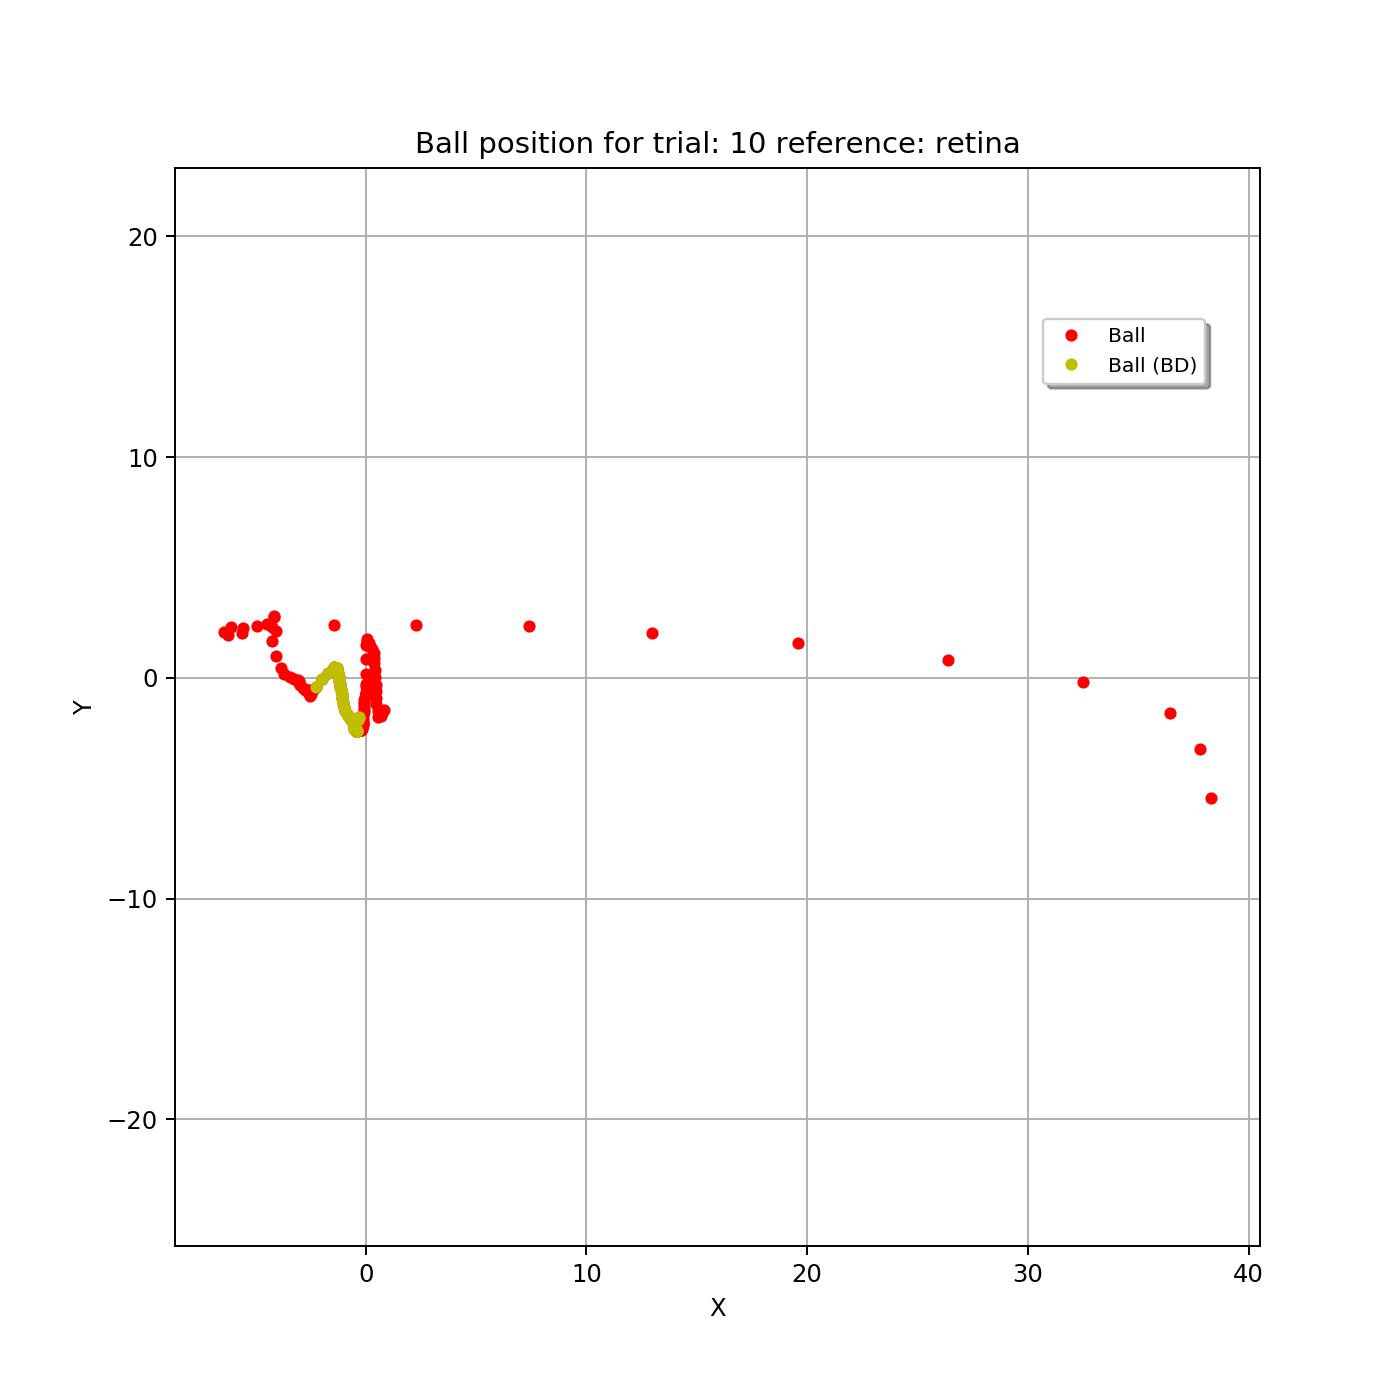

In [165]:
plot_ball_2D(rawDataFrame, processedDataFrame, trialInfoDataFrame, trialId = 10,
                  start_index = 'first_frame', end_index = 'ball_crossing_frame',
                  reference = 'retina', unit = 'degree', save_plot = True)

In [102]:
from inspect import signature
signature(plot_gaze_ball_2D)

<Signature (processedDataFrame, trialInfoDataFrame, trialId=3, start_index='first_frame', end_index='ball_crossing', reference='world', unit='degree', save_plot_file_name=False)>

In [99]:
trialInfoDataFrame.loc[5,['ballCrossingIndex']].values[0]

1638

In [ ]:
trialInfoDataFrame.loc[5,['ballCrossingIndex']].values

In [109]:
list(rawDataFrame.columns)

[('frameNumber', ''),
 ('IOD', ''),
 ('IPD', ''),
 ('ballFinalPos', 'X'),
 ('ballFinalPos', 'Y'),
 ('ballFinalPos', 'Z'),
 ('ballInitialPos', 'X'),
 ('ballInitialPos', 'Y'),
 ('ballInitialPos', 'Z'),
 ('ballInitialVel', 'X'),
 ('ballInitialVel', 'Y'),
 ('ballInitialVel', 'Z'),
 ('ballPos', 'X'),
 ('ballPos', 'Y'),
 ('ballPos', 'Z'),
 ('ballTTC', ''),
 ('ballVel', 'X'),
 ('ballVel', 'Y'),
 ('ballVel', 'Z'),
 ('blankDur', ''),
 ('blockNumber', ''),
 ('calibrationCounter', ''),
 ('calibrationPos', 'X'),
 ('calibrationPos', 'Y'),
 ('calibrationPos', 'Z'),
 ('cycEyeBasePoint', 'X'),
 ('cycEyeBasePoint', 'Y'),
 ('cycEyeBasePoint', 'Z'),
 ('cycEyeInHead', 'X'),
 ('cycEyeInHead', 'Y'),
 ('cycEyeInHead', 'Z'),
 ('cycEyeNodeInWorld', 'X'),
 ('cycEyeNodeInWorld', 'Y'),
 ('cycEyeNodeInWorld', 'Z'),
 ('cycEyeOnScreen', 'X'),
 ('cycEyeOnScreen', 'Y'),
 ('cycGazeNodeInWorld', 'X'),
 ('cycGazeNodeInWorld', 'Y'),
 ('cycGazeNodeInWorld', 'Z'),
 ('cycInverseMat', '0'),
 ('cycInverseMat', '1'),
 ('cycInve

In [112]:
rawDataFrame.isBallVisibleQ.values

array([True, True, True, ..., True, True, True], dtype=object)